## prepare original data

In [1]:
import pandas as pd
import numpy as np
import jieba
import re
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('./ai_challenger_sentiment_analysis_trainingset_20180816/sentiment_analysis_trainingset.csv')
valid = pd.read_csv('./ai_challenger_sentiment_analysis_validationset_20180816/sentiment_analysis_validationset.csv')

In [3]:
train.keys()

Index(['id', 'content', 'location_traffic_convenience',
       'location_distance_from_business_district', 'location_easy_to_find',
       'service_wait_time', 'service_waiters_attitude',
       'service_parking_convenience', 'service_serving_speed', 'price_level',
       'price_cost_effective', 'price_discount', 'environment_decoration',
       'environment_noise', 'environment_space', 'environment_cleaness',
       'dish_portion', 'dish_taste', 'dish_look', 'dish_recommendation',
       'others_overall_experience', 'others_willing_to_consume_again'],
      dtype='object')

In [4]:
location_item = [
    'location_traffic_convenience', 
    'location_distance_from_business_district', 
    'location_easy_to_find'
]
service_item = [
    'service_wait_time', 
    'service_waiters_attitude', 
    'service_parking_convenience',
    'service_serving_speed'
]
price_item = [
    'price_level', 
    'price_cost_effective', 
    'price_discount'
]
environment_item = [
    'environment_decoration',
    'environment_noise',
    'environment_space',
    'environment_cleaness',
]
dish_item = [
    'dish_portion',
    'dish_taste',
    'dish_look',
    'dish_recommendation',
]
others_item = [
    'others_overall_experience',
    'others_willing_to_consume_again'
]

In [5]:
def get_coarse_y(database):
    items = [location_item, service_item, price_item, environment_item, dish_item, others_item]
    coarse_y = []
    
    for item in items:
        item_y = [0 if sum(score) == -6 else 1 for score in list(database[item].values)]
        coarse_y.append(item_y)
    
    return np.array(coarse_y).T

In [6]:
train_y = get_coarse_y(train)
valid_y = get_coarse_y(valid)

In [7]:
train_content = train['content'].tolist()
valid_content = valid['content'].tolist()

In [8]:
def sentence_to_token(sentences):
    # remove extra character
    clean_sentences = [' '.join(re.findall(re.compile('[\w|\d|]+'), sen)) for sen in sentences]
    
    jieba.enable_parallel(8)
    
    tokens = [' '.join(jieba.cut(sen)) for sen in clean_sentences]
    return tokens

In [9]:
train_tokens = sentence_to_token(train_content)
valid_tokens = sentence_to_token(valid_content)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.827 seconds.
Prefix dict has been built succesfully.
Process ForkPoolWorker-13:
Process ForkPoolWorker-11:
Process ForkPoolWorker-12:
Process ForkPoolWorker-15:
Process ForkPoolWorker-14:
Process ForkPoolWorker-16:
Process ForkPoolWorker-6:
Process ForkPoolWorker-8:
Process ForkPoolWorker-10:
Process ForkPoolWorker-5:
Process ForkPoolWorker-1:
Process ForkPoolWorker-4:
Process ForkPoolWorker-7:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/lin/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File

  File "/home/lin/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/lin/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/lin/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/lin/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/lin/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/lin/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/lin/anaconda3/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/lin/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/lin/anaconda3/lib/python3.7

In [10]:
train_tokens[:3]

['吼吼 吼   萌死 人 的 棒棒糖   中 了 大众 点评 的 霸王餐   太 可爱 了   一直 就 好奇 这个 棒棒糖 是 怎么 个 东西   大众 点评 给 了 我 这个 土老冒 一个 见识 的 机会   看 介绍 棒棒糖 是 用 德国 糖 做 的   不会 很甜   中间 的 照片 是 糯米 的   能 食用   真是太 高端 大气 上档次 了   还 可以 买 蝴蝶结 扎口   送人 可以 买 礼盒   我 是 先 打 的 卖家 电话   加 了 微信   给 卖家 传 的 照片   等 了 几天   卖家 就 告诉 我 可以 取货 了   去 大官 屯 那取 的   虽然 连 卖家 的 面 都 没 见到   但是 还是 谢谢 卖家 送 我 这么 可爱 的 东西   太 喜欢 了   这 哪 舍得吃 啊',
 '第三次 参加 大众 点评 网 霸王餐 的 活动   这家 店 给 人 整体 感觉 一般   首先 环境 只能 算 中等   其次 霸王餐 提供 的 菜品 也 不是 很多   当然 商家 为了 避免 参加 霸王餐 吃不饱 的 现象   给 每桌 都 提供 了 至少 六份 主食   我们 那桌 都 提供 了 两份 年糕   第一次 吃火锅 会 在 桌上 有 这么 多 的 主食 了   整体 来说 这家 火锅店 没有 什么 特别 有 特色 的   不过 每份 菜品 分量 还是 比较 足 的   这点 要 肯定   至于 价格   因为 没有 看 菜单 不 了解   不过 我 看 大众 有 这家 店 的 团购 代金券   相当于 7 折   应该 价位 不会 很 高 的   最后 还是 要 感谢 商家 提供 霸王餐   祝 生意兴隆   财源 广进',
 '4 人 同行   点 了 10 个 小吃   榴莲 酥   榴莲 味道 不足   松软   奶味 浓   虾饺   好吃   两颗 大 虾仁   皮蛋 粥   皮蛋 多   但是 一般   挺 稠 的   奶黄包   很 好吃   真的 是 蛋黄 和 奶   而且 真的 是 流沙   叉烧包   面香   鲜虾 烧卖   好吃   外面 的 黄色 皮 看着 让 人 特别 有 食欲   云吞面   云吞 分量 足   但是 汤头 不是 很 好喝   而且 云吞 的 馅儿 不知 为何 感觉 不是 很 新

## pre-process data

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [12]:
max_feature = 20000
max_len = 400

In [13]:
tokenizer = Tokenizer(num_words=max_feature)
tokenizer.fit_on_texts(train_tokens)

train_sequences = tokenizer.texts_to_sequences(train_tokens)
valid_sequences = tokenizer.texts_to_sequences(valid_tokens)

In [14]:
total_num = [len(token) for token in train_sequences]

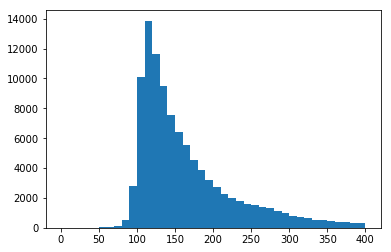

In [15]:
plt.hist(total_num,bins = np.arange(0,410,10))
plt.show()

In [16]:
train_sequences[0]

[7596,
 7492,
 25,
 1,
 13692,
 148,
 2,
 144,
 89,
 1,
 271,
 100,
 802,
 2,
 142,
 9,
 2641,
 51,
 13692,
 3,
 315,
 79,
 147,
 144,
 89,
 56,
 2,
 10,
 51,
 32,
 7080,
 1,
 417,
 98,
 459,
 13692,
 3,
 92,
 3495,
 1087,
 81,
 1,
 126,
 1195,
 582,
 1,
 1021,
 3,
 989,
 1,
 91,
 2446,
 2412,
 2098,
 1789,
 3521,
 2,
 14,
 19,
 181,
 14297,
 19,
 181,
 7688,
 10,
 3,
 468,
 448,
 1,
 5660,
 964,
 192,
 2,
 1058,
 56,
 5660,
 6785,
 1,
 1021,
 88,
 2,
 1285,
 5660,
 9,
 763,
 10,
 19,
 19218,
 2,
 22,
 8145,
 1,
 130,
 599,
 5660,
 1,
 206,
 7,
 49,
 1824,
 36,
 21,
 1382,
 5660,
 207,
 10,
 211,
 802,
 1,
 147,
 100,
 38,
 2,
 72,
 1520,
 18252,
 59]

In [17]:
train_x = pad_sequences(train_sequences, maxlen=max_len)
valid_x = pad_sequences(valid_sequences, maxlen=max_len)

In [18]:
len(train_x)

105000

## coarse sentiment predict

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GlobalMaxPool1D, Dropout, BatchNormalization,Bidirectional, GRU
import keras

In [24]:
def coarse_sentiment_model():
    model = Sequential()
    embedding_size = 200
    model.add(Embedding(max_feature, embedding_size, input_length=max_len))
    #model.add(Bidirectional(LSTM(100, return_sequences=True)))
    model.add(Bidirectional(GRU(100, return_sequences=True)))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation="sigmoid"))
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [44]:
batch_size = 1024
epochs = 2

In [26]:
coarse_model = coarse_sentiment_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
coarse_model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 94500 samples, validate on 10500 samples
Epoch 1/2
94500/94500 [==============================] - 177s 2ms/step - loss: 0.3779 - acc: 0.8442 - val_loss: 0.2524 - val_acc: 0.9156
Epoch 2/2
94500/94500 [==============================] - 171s 2ms/step - loss: 0.2442 - acc: 0.9130 - val_loss: 0.2339 - val_acc: 0.9160


In [28]:
loss, acc = coarse_model.evaluate(valid_x, valid_y, batch_size=batch_size)

15000/15000 [==============================] - 8s 520us/step


In [29]:
print("loss: {}, acc: {}".format(loss, acc))

loss: 0.23810461955070494, acc: 0.9144555386225383


## fine sentiment predict

In [19]:
def fine_sentiment_model(output_len):
    embedding_size = 200
    
    model = Sequential()
    model.add(Embedding(max_feature, embedding_size, input_length=max_len))
    model.add(Bidirectional(LSTM(100, return_sequences=True)))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(output_len, activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

自定义accuarcy的原因

首先keras的accuarcy，计算逻辑是：np.mean(np.equal(y_true, y_pred))
当y是多标签的时候

```
         [1, 0, 0]
y_true = [1, 0, 0]
         [1, 0, 0]
         
         [0, 1, 0]
y_true = [1, 0, 0]
         [1, 0, 0]
```
keras是算每个 $y_{i,j}$是否相同，比如这里只有$y_{0,1}$不同，所以精确度是 $1 - \frac{1}{9}$

而sklearn的accuracy_score是怎么算的呢，
它只按每次采样算，即按行算，如果这一行里，只要有一个值不相等，就判断该采样时失败的
这里的精确度是 $1 - \frac{1}{3}$

In [20]:
def find_sentiment_accuarcy(y_true, y_prob):
    # 按照选择最大概率的原则，进行分类
    np_y_true = y_true
    np_y_prob = y_prob
    
    row, col = np_y_true.shape
    
    labels = np.zeros((row, col), dtype=int)
    
    pred_result = np.zeros((row, int(col / 4)), dtype=int)
    
    for i in range(row):
        for j in range(0, col, 4):
            max_prob_idx = j + np.argmax(np_y_prob[i, j:j + 4])
            labels[i, max_prob_idx] = 1

    for i in range(row):
        for j in range(0, col, 4):
            pred_result[i, int(j / 4)] = np.where(
                np.sum(np.equal(np_y_true[i, j:j + 4], labels[i, j:j + 4])) == 4, 
                1, 0)
    
    return np.mean(pred_result)

In [38]:
class Metrics(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self._data = []

    def on_epoch_end(self, batch, logs={}):
        X_val, y_val = self.validation_data[0], self.validation_data[1]
        y_predict = self.model.predict(X_val, batch_size=5000)
  
        print('cus_acc: {}'.format(find_sentiment_accuarcy(y_val, y_predict)))
        
        return
    
    def get_data(self):
        return self._data

In [39]:
metrics = Metrics()

In [40]:
def get_fine_y(database, items):
    y_items = database[items].values
    
    # expand [-2, -1, 0, 1] to array index
    y_items += 2
    
    y_fine = np.zeros((len(database), 4 * len(items)))
    
    for i in range(y_items.shape[0]):
        for j in range(y_items.shape[1]):
            y_fine[i, j * 4 + y_items[i, j]] = 1
    
    return y_fine 

## location classification

In [35]:
train_y_loc = get_fine_y(train, location_item)
valid_y_loc = get_fine_y(valid, location_item)

In [44]:
loc_model = fine_sentiment_model(len(location_item) * 4)

In [45]:
loc_model.fit(train_x, train_y_loc, 
              batch_size=batch_size, epochs=epochs, 
              validation_data=(valid_x, valid_y_loc), callbacks=[metrics])

Train on 105000 samples, validate on 15000 samples
Epoch 1/2
105000/105000 [==============================] - 246s 2ms/step - loss: 0.3286 - acc: 0.8544 - val_loss: 0.1566 - val_acc: 0.9485
cus_acc: 0.8952222222222223
Epoch 2/2
105000/105000 [==============================] - 243s 2ms/step - loss: 0.1497 - acc: 0.9478 - val_loss: 0.1415 - val_acc: 0.9523
cus_acc: 0.9042444444444444


In [132]:
#loss, acc = loc_model.evaluate(valid_x, valid_y_fine_loc, batch_size=batch_size)
#print("loss: {}, acc: {}".format(loss, acc))

15000/15000 [==============================] - 10s 675us/step
loss: 0.13337093387444815, acc: 0.9521444370269775


In [350]:
#predict_y = loc_model.predict(valid_x[:20])

## service classification

In [41]:
service_model = fine_sentiment_model(len(service_item) * 4)

In [42]:
train_y_service = get_fine_y(train, service_item)
valid_y_service = get_fine_y(valid, service_item)

In [43]:
service_model.fit(train_x, train_y_service, 
                  batch_size=batch_size, epochs=epochs, 
                  validation_data=(valid_x, valid_y_service), callbacks=[metrics])

Train on 105000 samples, validate on 15000 samples
Epoch 1/2
105000/105000 [==============================] - 245s 2ms/step - loss: 0.3286 - acc: 0.8667 - val_loss: 0.1503 - val_acc: 0.9458
cus_acc: 0.8888166666666667
Epoch 2/2
105000/105000 [==============================] - 242s 2ms/step - loss: 0.1522 - acc: 0.9453 - val_loss: 0.1338 - val_acc: 0.9510
cus_acc: 0.8986833333333333


In [44]:
#predict_y = service_model.predict(valid_x, batch_size=5000, verbose=1)
#predict_y

## price classification

In [45]:
price_model = fine_sentiment_model(len(price_item) * 4)

In [46]:
train_y_price = get_fine_y(train, price_item)
valid_y_price = get_fine_y(valid, price_item)

In [47]:
price_model.fit(train_x, train_y_price, 
                  batch_size=batch_size, epochs=epochs, 
                  validation_data=(valid_x, valid_y_price), callbacks=[metrics])

Train on 105000 samples, validate on 15000 samples
Epoch 1/2
105000/105000 [==============================] - 245s 2ms/step - loss: 0.4221 - acc: 0.7977 - val_loss: 0.2411 - val_acc: 0.9022
cus_acc: 0.8001555555555555
Epoch 2/2
105000/105000 [==============================] - 243s 2ms/step - loss: 0.2330 - acc: 0.9048 - val_loss: 0.2139 - val_acc: 0.9118
cus_acc: 0.8208666666666666


## environment classification

In [48]:
env_model = fine_sentiment_model(len(environment_item) * 4)

In [49]:
train_y_env = get_fine_y(train, environment_item)
valid_y_env = get_fine_y(valid, environment_item)

In [50]:
env_model.fit(train_x, train_y_env, 
                  batch_size=batch_size, epochs=epochs, 
                  validation_data=(valid_x, valid_y_env), callbacks=[metrics])

Train on 105000 samples, validate on 15000 samples
Epoch 1/2
105000/105000 [==============================] - 248s 2ms/step - loss: 0.4105 - acc: 0.8065 - val_loss: 0.2417 - val_acc: 0.9032
cus_acc: 0.7990666666666667
Epoch 2/2
105000/105000 [==============================] - 243s 2ms/step - loss: 0.2364 - acc: 0.9073 - val_loss: 0.2104 - val_acc: 0.9172
cus_acc: 0.8305666666666667


## dish_item

In [52]:
dish_model = fine_sentiment_model(len(dish_item) * 4)

In [61]:
train_y_dish = get_fine_y(train, dish_item)
valid_y_dish = get_fine_y(valid, dish_item)

In [54]:
dish_model.fit(train_x, train_y_dish, 
                  batch_size=batch_size, epochs=epochs, 
                  validation_data=(valid_x, valid_y_dish), callbacks=[metrics])

Train on 105000 samples, validate on 15000 samples
Epoch 1/2
105000/105000 [==============================] - 247s 2ms/step - loss: 0.4355 - acc: 0.7953 - val_loss: 0.3153 - val_acc: 0.8745
cus_acc: 0.7485833333333334
Epoch 2/2
105000/105000 [==============================] - 244s 2ms/step - loss: 0.2770 - acc: 0.8892 - val_loss: 0.2810 - val_acc: 0.8919
cus_acc: 0.7802166666666667


## others_item

In [55]:
others_model = fine_sentiment_model(len(others_item) * 4)

In [53]:
train_y_others = get_fine_y(train, others_item)
valid_y_others = get_fine_y(valid, others_item)

In [57]:
others_model.fit(train_x, train_y_others, 
                  batch_size=batch_size, epochs=epochs, 
                  validation_data=(valid_x, valid_y_others), callbacks=[metrics])

Train on 105000 samples, validate on 15000 samples
Epoch 1/2
105000/105000 [==============================] - 248s 2ms/step - loss: 0.3798 - acc: 0.8255 - val_loss: 0.2248 - val_acc: 0.9096
cus_acc: 0.8164333333333333
Epoch 2/2
105000/105000 [==============================] - 243s 2ms/step - loss: 0.2212 - acc: 0.9126 - val_loss: 0.2154 - val_acc: 0.9117
cus_acc: 0.8226333333333333


## summary

## all sentiment item

In [30]:
all_item = location_item + service_item + price_item + environment_item + dish_item + others_item

In [42]:
train_y_all = get_fine_y(train, all_item)
valid_y_all = get_fine_y(valid, all_item)

In [80]:
all_model = fine_sentiment_model(len(all_item) * 4)

In [81]:
all_model.fit(train_x, train_y_all, 
                  batch_size=batch_size, epochs=epochs, 
                  validation_data=(valid_x, valid_y_all), callbacks=[metrics])

Train on 105000 samples, validate on 15000 samples
Epoch 1/2
105000/105000 [==============================] - 251s 2ms/step - loss: 0.4691 - acc: 0.7729 - val_loss: 0.3093 - val_acc: 0.8750
cus_acc: 0.74238
Epoch 2/2
105000/105000 [==============================] - 247s 2ms/step - loss: 0.2951 - acc: 0.8801 - val_loss: 0.2581 - val_acc: 0.8964
cus_acc: 0.7846033333333333


# optimize

## remove stop words

In [22]:
def prepare_stopwords():
    stopwords = []
    with open('baidu_stopwords.txt', 'r') as f:
        word = f.readline()
        while word:
            stopwords.append(word)
            word = ''.join(f.readline().split())
    return stopwords

In [23]:
stopwords = prepare_stopwords()
len(stopwords)

1395

In [24]:
def remove_stopwords(token):
    ret = []
    for t in token.split():
        if t in stopwords:
            continue
        ret.append(t)
    return ' '.join(ret)

In [25]:
train_no_stopwords_tokens = list(map(remove_stopwords, train_tokens))

In [26]:
valid_no_stopwords_tokens = list(map(remove_stopwords, valid_tokens))

In [27]:
tokenizer = Tokenizer(num_words=max_feature)
tokenizer.fit_on_texts(train_no_stopwords_tokens)

train_sequences_ns = tokenizer.texts_to_sequences(train_no_stopwords_tokens)
valid_sequences_ns = tokenizer.texts_to_sequences(valid_no_stopwords_tokens)

train_x_ns = pad_sequences(train_sequences_ns, maxlen=max_len)
valid_x_ns = pad_sequences(valid_sequences_ns, maxlen=max_len)

In [49]:
def test_model(output_len):
    embedding_size = 200
    
    model = Sequential()
    model.add(Embedding(max_feature, embedding_size, input_length=max_len))
    model.add(Bidirectional(LSTM(100, return_sequences=True)))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(output_len, activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [33]:
all_model = fine_sentiment_model(len(all_item) * 4)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [101]:
all_model.fit(train_x_ns, train_y_all, 
                  batch_size=batch_size, epochs=epochs, 
                  validation_data=(valid_x_ns, valid_y_all), callbacks=[metrics])

Train on 105000 samples, validate on 15000 samples
Epoch 1/2
105000/105000 [==============================] - 253s 2ms/step - loss: 0.4526 - acc: 0.7853 - val_loss: 0.2963 - val_acc: 0.8801
cus_acc: 0.7544666666666666
Epoch 2/2
105000/105000 [==============================] - 249s 2ms/step - loss: 0.2912 - acc: 0.8823 - val_loss: 0.2553 - val_acc: 0.8981
cus_acc: 0.7887566666666667


In [50]:
t_model = test_model(len(all_item) * 4)

In [51]:
t_model.fit(train_x_ns, train_y_all, 
                  batch_size=batch_size, epochs=epochs, 
                  validation_data=(valid_x_ns, valid_y_all), callbacks=[metrics])

Train on 105000 samples, validate on 15000 samples
Epoch 1/2
105000/105000 [==============================] - 245s 2ms/step - loss: 0.4137 - acc: 0.8169 - val_loss: 0.2813 - val_acc: 0.8868
cus_acc: 0.7659966666666667
Epoch 2/2
105000/105000 [==============================] - 242s 2ms/step - loss: 0.2732 - acc: 0.8913 - val_loss: 0.2433 - val_acc: 0.9020
cus_acc: 0.7969666666666667


In [53]:
from gensim.models import Word2Vec

In [54]:
w2v_model = Word2Vec.load('vector')

/home/lin/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [56]:
def prepare_word_vector_weight(one_hot_tokenizer, word_model, num_words, dim):
    
    embedding_matrix = np.zeros((num_words, dim))
    
    word_index = one_hot_tokenizer.word_index
    
    for word, idx in word_index.items():
        if idx >= num_words:
            continue
        try:
            embedding_vector = word_model.wv[word]
            embedding_matrix[idx] = embedding_vector
        except KeyError:
            #print("exceptino {} {}".format(word, idx))
            embedding_matrix[idx]=np.random.normal(0, np.sqrt(0.25), dim)
            
    return embedding_matrix

In [58]:
word_weight = prepare_word_vector_weight(tokenizer, w2v_model, max_feature, 200)
word_weight

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-3.64662671,  2.06254768,  0.91882145, ..., -0.95791441,
        -0.03822494,  0.00672168],
       [-0.18510048,  1.51968443,  0.18783356, ..., -1.41595054,
         2.24965906, -0.54286265],
       ...,
       [-0.09556194,  0.47229677,  0.23177828, ...,  0.08421881,
        -0.36064297,  0.28705683],
       [-0.05774608,  0.51059407, -0.09923248, ..., -0.22529501,
        -0.08396143, -0.3560538 ],
       [-0.40956119,  0.10312871,  0.33381173, ...,  0.45765695,
        -0.55587614, -0.02540402]])

In [59]:
def test_weight_model(output_len, weight):
    embedding_size = 200
    
    model = Sequential()
    model.add(Embedding(max_feature, embedding_size, weights=[weight], input_length=max_len))
    model.add(Bidirectional(LSTM(100, return_sequences=True)))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(output_len, activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [62]:
t_model = test_weight_model(len(all_item) * 4, word_weight)

In [63]:
t_model.fit(train_x_ns, train_y_all, 
                  batch_size=batch_size, epochs=epochs, 
                  validation_data=(valid_x_ns, valid_y_all), callbacks=[metrics])

Train on 105000 samples, validate on 15000 samples
Epoch 1/2
105000/105000 [==============================] - 245s 2ms/step - loss: 0.4136 - acc: 0.8130 - val_loss: 0.2860 - val_acc: 0.8859
cus_acc: 0.7618266666666667
Epoch 2/2
105000/105000 [==============================] - 242s 2ms/step - loss: 0.2730 - acc: 0.8922 - val_loss: 0.2377 - val_acc: 0.9055
cus_acc: 0.8024233333333334


# Summary

In [ ]:
基于valid的测试，精度为 0.8024233333333334

经过多轮测试和优化，发现最好的模型是：test_weight_model

增大Dropout，可以显著减少过拟合

另外，词向量使用的是开源语料库，地址：https://github.com/SophonPlus/ChineseNlpCorpus

使用了其中的数据yf_dianping，100万条评论用于训练词向量

基本流程为：

* 过滤停止词
* 导入词向量
* 一层Embedding
* 一层双向LSTM(试了GRP)

